## SVM

굉장히 강력하면서도, 선형과 비선형 분류, 회귀, 이상치 탐색 등 다양한 분야에 응용할 수 있는 알고리즘!

### Linear SVM

선형으로 분류가 가능한 데이터의 경우 이들을 가장 잘 분리하는 방법은 클래스 사이의 경계선을 가장 넉넉하게 잡는 것이다. 클래스 사이를 가로지르는
도로 중 가장 폭이 넓은 것을 찾는 문제로 생각할 수 있다. 이를 **라지 마진 분류**라고 한다.

라지 마진 분류는 다시 **하드 마진 분류**와 **소프트 마진 분류**로 나뉜다. 하드 마진 분류의 경우 두 클래스를 완벽하게 나누는 분류 방법을 찾는 문제이고, 소프트 마진 분류는 어느 정도의 오차를 허용하는 경계선을 그리는 것을 목적으로 한다. 다만 현실의 데이터는 대부분 이상치를 포함하고 있거나 경계선이 매우 모호하므로 대부분 소프트 마진 분류가 범용성이 있다.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]    # 꽃잎 넓이, 꽃잎 길이
y = (iris["target"] == 2).astype(np.float64)    # Iris-Virginica만 1, 0 otherwise

In [5]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [6]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

### Nonlinear SVM

선형 SVM 분류기가 굉장히 효율적이고, 많은 문제들에 사용할 수 있으나 여전히 비선형적인 데이터셋은 존재한다. 이들을 다루는 한 가지 방법은 기존의 특성으로부터 새로운 특성을 만들어 내 추가하는 것이다.  
이렇게하면 데이터셋이 선형적으로 분류되게끔 만들어볼 수 있다.

#### Polynomial Kernel

이전에 살펴 보았던 Polynomial feature expansion을 이용해 다항식 특성(원본 데이터의 제곱, 세제곱.. 등)을 추가한다.  


In [8]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [9]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("std_scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [13]:
X.shape

(100, 2)

(20, 28) (20, 28)
(20, 28)


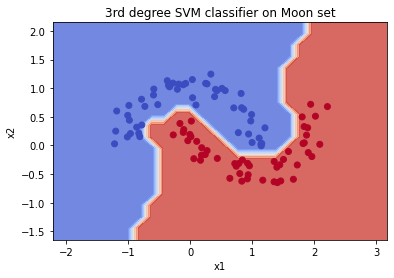

In [19]:
# plot data
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot

print(xx.shape, yy.shape)

Z = Z.reshape(xx.shape)

print(Z.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("3rd degree SVM classifier on Moon set")
plt.show()

#### RBF kernels

데이터셋에 랜드마크를 추가하고 유사도 함수를 이용해 이 랜드마크와 데이터 포인트가 얼마나 유사한가를 판단할 수도 있다.

#### Gaussian RBF kernel

In [10]:
from sklearn.svm import SVC

In [11]:
rbf_kernel_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])